# Solutions - Practical Lesson 2

## Exercises

### Exercise 1.1
Write code:

* print the day of the week of your birthday
* print the weekday of your birthdays for the next 120 years

#### Solution

In [47]:
import datetime

birthday = datetime.date(1974, 10, 20)
print (birthday.weekday()) # remeber it starts form 0

6


In [50]:
from dateutil.relativedelta import relativedelta

for i in range(120):
    print ((birthday + relativedelta(years=i)).weekday())

6
0
2
3
4
5
0
1
2
3
5
6
0
1
3
4
5
6
1
2
3
4
6
0
1
2
4
5
6
0
2
3
4
5
0
1
2
3
5
6
0
1
3
4
5
6
1
2
3
4
6
0
1
2
4
5
6
0
2
3
4
5
0
1
2
3
5
6
0
1
3
4
5
6
1
2
3
4
6
0
1
2
4
5
6
0
2
3
4
5
0
1
2
3
5
6
0
1
3
4
5
6
1
2
3
4
6
0
1
2
4
5
6
0
2
3
4
5
0
1


### Exercise 1.2
Write code to determine whether a given year is a leap year and test it with 1800, 1987 and 2020.

#### Solution

In [51]:

years = [1800, 1987, 2020]

for y in years:
    if y % 400 == 0:
        print ("{} is a leap year ".format(y))
    elif y % 100 == 0:
        print ("{} is NOT a leap year ".format(y))
    elif y % 4 == 0:
        print ("{} is a leap year ".format(y))
    else:
        print ("{} is NOT a leap year ".format(y))


1800 is NOT a leap year 
1987 is NOT a leap year 
2020 is a leap year 


### Exercise 1.3
Write code to print next 5 days starting from today.

#### Solution

In [52]:
d = datetime.date.today()
for i in range(1, 6):
    print (d + relativedelta(days=i))

2020-08-04
2020-08-05
2020-08-06
2020-08-07
2020-08-08


### Exercise 1.4
Using `pandas` import data stored in `stock_market.xlsx` (you can find it in the same web page besides this notes).
With the resulting dataframe determine:
* remove duplicates and missing data (how many rows are left ?)
* stocks with positive variation
* the first five stocks with the lowest price

#### Solution
First load the excel file into a dataframe and look at data structure.

In [18]:
import pandas as pd

df = pd.read_excel("stock_market.xlsx")

print (len(df))
df.head()

51


,Symbol,Name,Price,Change,Change%,Volume (M),Avg Volume (M),Market Cap (B)
0,GE,General Electric Company,6.07,-0.19,-0.0304,142.732,102.268,53.132
1,NOK,Nokia Corporation,4.78,0.33,0.0742,117.960,31.296,27.083
2,F,Ford Motor Company,6.61,-0.13,-0.0193,115.394,87.719,26.288
3,PINS,"Pinterest, Inc.",34.29,9.10,0.3613,111.864,15.550,20.110
4,AAPL,Apple Inc.,425.04,40.28,0.1047,93.574,35.035,1821.000


As usual if we are not sure that our data is *clean* we should check for duplicates and NaN and take care of them.
the `duplicated` method returns the status of each row (duplicate or not, True or False). If we would like just to see the duplicated entries we could combine the `duplicated` method with the selection syntax like this:

In [13]:
df[df.duplicated() == True]

,Symbol,Name,Price,Change,Change%,Volume (M),Avg Volume (M),Market Cap (B)
40,RUN,Sunrun Inc.,36.69,0.02,0.0005,20.113,3.604,4.489


So it looks like we have just one duplicate and we can remove it:

In [15]:
print ("Before duplicates removal: {}".format(len(df)))
df = df.drop_duplicates()
print ("After duplicates removal: {}".format(len(df)))

Before duplicates removal: 50
After duplicates removal: 50


Then we need to take care of the NaN, again if we want to check the rows with NaN we can select (here the syntax is a little bit more complicated since we need to use `any` to look for Nan in every column):

In [22]:
df[df.isna().any(axis=1)]

,Symbol,Name,Price,Change,Change%,Volume (M),Avg Volume (M),Market Cap (B)
23,NCLH,Norwegian Cruise Line Holdings Ltd.,13.64,-0.53,-0.0374,28.402,64.895,NaN
47,NBL,"Noble Energy, Inc.",NaN,-0.23,-0.0225,18.462,13.535,4.795


Since we don't want to artificially modify our sample we just drop rows with NaN:

In [23]:
print ("Before NaN removal: {}".format(len(df)))
df = df.dropna()
print ("After NaN removal: {}".format(len(df)))

Before NaN removal: 51
After NaN removal: 49


The second point asks to determine the companies with a daily positive variation. Clearly we have to apply to the dataframe a selection on the "Change" (or "Change%") column requiring positive values.

In [24]:
pos_var = df[df.loc[:, "Change"] > 0]

print (len(pos_var))
pos_var.head() # just printing the first 5 rows

16


,Symbol,Name,Price,Change,Change%,Volume (M),Avg Volume (M),Market Cap (B)
1,NOK,Nokia Corporation,4.78,0.33,0.0742,117.960,31.296,27.083
3,PINS,"Pinterest, Inc.",34.29,9.10,0.3613,111.864,15.550,20.110
4,AAPL,Apple Inc.,425.04,40.28,0.1047,93.574,35.035,1821.000
6,BAC,Bank of America Corporation,24.88,0.04,0.0016,62.039,72.793,215.562
8,FB,"Facebook, Inc.",253.67,19.17,0.0817,53.030,24.521,723.726


So in origin we had 48 stocks and just 16 have a positive variation of its price.

The last question requires to print the first 5 stocks with the lowest prices. In this case it is enough to sort by price the dataframe (ascending) and then just select the first 5 entries.

In [25]:
highest_price = df.sort_values(by=['Price'], ascending=True)[:5]

highest_price

,Symbol,Name,Price,Change,Change%,Volume (M),Avg Volume (M),Market Cap (B)
25,ABEV,Ambev S. A.,2.68,-0.16,-0.0563,26.136,36.654,41.999
32,BBD,Banco Bradesco S. A.,4.22,-0.32,-0.0705,22.129,22.046,36.739
1,NOK,Nokia Corporation,4.78,0.33,0.0742,117.960,31.296,27.083
15,OPK,"OPKO Health, Inc.",5.15,-0.76,-0.1286,35.762,17.792,3.450
33,MRO,Marathon Oil Corporation,5.49,-0.02,-0.0036,21.249,34.098,4.339


### Exercise 1.5
Given the following discount factors and pillars plot the corresponding discount curve.

#### Solution

In [35]:
import datetime

dfs = [1.0, 1.0014907894567657, 1.0031038833235129, 1.0047764800189012,
       1.0065986105304596, 1.014496095021891, 1.022687560553011,
       1.0303585751965112, 1.0369440287181253, 1.0422287558021188,
       1.0461834022163963, 1.0489228953047331, 1.0505725627906783,
       1.0513323539753632, 1.0513777790851995, 1.0508768750534248,
       1.049935905228433, 1.0486741093761602, 1.047175413484517,
       1.0455115431993336, 1.0437147446170034, 1.0418294960952215,
       1.0398823957504923, 1.0378979499878478, 1.0358789099539805,
       1.0338409767365169, 1.031791178324756, 1.0297378455884902,
       1.0276772747965244, 1.0256154380560942, 1.0235543974485939,
       1.0214974135391857, 1.0194401540150835, 1.0173862951028778]
       
pillars = [datetime.date(2020, 8, 3), datetime.date(2020, 11, 3), datetime.date(2021, 2, 3),
           datetime.date(2021, 5, 3), datetime.date(2021, 8, 3), datetime.date(2022, 8, 3),
           datetime.date(2023, 8, 3), datetime.date(2024, 8, 3), datetime.date(2025, 8, 3),
           datetime.date(2026, 8, 3), datetime.date(2027, 8, 3), datetime.date(2028, 8, 3),
           datetime.date(2029, 8, 3), datetime.date(2030, 8, 3), datetime.date(2031, 8, 3),
           datetime.date(2032, 8, 3), datetime.date(2033, 8, 3), datetime.date(2034, 8, 3),
           datetime.date(2035, 8, 3), datetime.date(2036, 8, 3), datetime.date(2037, 8, 3),
           datetime.date(2038, 8, 3), datetime.date(2039, 8, 3), datetime.date(2040, 8, 3),
           datetime.date(2041, 8, 3), datetime.date(2042, 8, 3), datetime.date(2043, 8, 3),
           datetime.date(2044, 8, 3), datetime.date(2045, 8, 3), datetime.date(2046, 8, 3),
           datetime.date(2047, 8, 3), datetime.date(2048, 8, 3), datetime.date(2049, 8, 3),
           datetime.date(2050, 8, 3)]

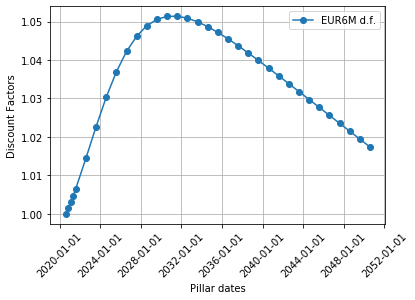

In [42]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

plt.plot(pillars, dfs, marker="o", label="EUR6M d.f.")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# this one instead rotate labels to avoid superimposition
plt.xticks(rotation=45)
plt.xlabel("Pillar dates")
plt.ylabel("Discount Factors")
plt.grid(True)
plt.legend()
plt.show()